# Imports

In [1]:
import gc
gc.enable()

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import scipy.stats as st
import pandas as pd
pd.set_option('precision', 4)
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

SEED = 2311

In [2]:
from sklearn.ensemble import ExtraTreesClassifier

In [3]:
train = pd.read_csv('../input/ml-olympiad-good-health-and-well-being/train.csv')
test = pd.read_csv('../input/ml-olympiad-good-health-and-well-being/test.csv')

In [4]:
train.shape, test.shape

((177576, 23), (76104, 22))

In [5]:
train.nunique()

PatientID            177576
HighBP                    2
HighChol                  2
CholCheck                 2
BMI                      81
Smoker                    2
Stroke                    2
Diabetes                  3
PhysActivity              2
Fruits                    2
Veggies                   2
HvyAlcoholConsump         2
AnyHealthcare             2
NoDocbcCost               2
GenHlth                   5
MentHlth                 31
PhysHlth                 31
DiffWalk                  2
Sex                       2
Age                      13
Education                 6
Income                    8
target                    2
dtype: int64

# target

In [6]:
train.target.value_counts()

0    160851
1     16725
Name: target, dtype: int64

In [7]:
train.target.value_counts(normalize=True)

0    0.9058
1    0.0942
Name: target, dtype: float64

Imbalanced target distribution.

# Binary categorical features

In [8]:
def display_stats(df, col, target):
    print(f'Relative frequency:\n{train[col].value_counts(normalize=True).sort_index()}')
    
    print(f'\nTarget distribution grouped by {col}:')
    print(train.groupby(col)[target].value_counts(normalize=True))
    
    print(f'\nCorrelation with target: {train[col].corr(train[target]):.4f}')

### HighBP

In [9]:
display_stats(train, 'HighBP', 'target')

Relative frequency:
0    0.5708
1    0.4292
Name: HighBP, dtype: float64

Target distribution grouped by HighBP:
HighBP  target
0       0         0.9590
        1         0.0410
1       0         0.8351
        1         0.1649
Name: target, dtype: float64

Correlation with target: 0.2098


### HighChol

In [10]:
display_stats(train, 'HighChol', 'target')

Relative frequency:
0    0.5761
1    0.4239
Name: HighChol, dtype: float64

Target distribution grouped by HighChol:
HighChol  target
0         0         0.9513
          1         0.0487
1         0         0.8440
          1         0.1560
Name: target, dtype: float64

Correlation with target: 0.1815


### CholCheck

In [11]:
display_stats(train, 'CholCheck', 'target')

Relative frequency:
0    0.0378
1    0.9622
Name: CholCheck, dtype: float64

Target distribution grouped by CholCheck:
CholCheck  target
0          0         0.9717
           1         0.0283
1          0         0.9032
           1         0.0968
Name: target, dtype: float64

Correlation with target: 0.0447


In [12]:
train['HighChol'].corr(train['CholCheck'])

0.08697725675980131

### Smoker

In [13]:
display_stats(train, 'Smoker', 'target')

Relative frequency:
0    0.5569
1    0.4431
Name: Smoker, dtype: float64

Target distribution grouped by Smoker:
Smoker  target
0       0         0.9357
        1         0.0643
1       0         0.8682
        1         0.1318
Name: target, dtype: float64

Correlation with target: 0.1147


### Stroke

In [14]:
display_stats(train, 'Stroke', 'target')

Relative frequency:
0    0.9597
1    0.0403
Name: Stroke, dtype: float64

Target distribution grouped by Stroke:
Stroke  target
0       0         0.9178
        1         0.0822
1       0         0.6205
        1         0.3795
Name: target, dtype: float64

Correlation with target: 0.2001


### PhysActivity

In [15]:
display_stats(train, 'PhysActivity', 'target')

Relative frequency:
0    0.2437
1    0.7563
Name: PhysActivity, dtype: float64

Target distribution grouped by PhysActivity:
PhysActivity  target
0             0         0.8621
              1         0.1379
1             0         0.9199
              1         0.0801
Name: target, dtype: float64

Correlation with target: -0.0850


### Fruits, Veggies

In [16]:
display_stats(train, 'Fruits', 'target')

Relative frequency:
0    0.3659
1    0.6341
Name: Fruits, dtype: float64

Target distribution grouped by Fruits:
Fruits  target
0       0         0.8979
        1         0.1021
1       0         0.9104
        1         0.0896
Name: target, dtype: float64

Correlation with target: -0.0205


In [17]:
display_stats(train, 'Veggies', 'target')

Relative frequency:
0    0.1888
1    0.8112
Name: Veggies, dtype: float64

Target distribution grouped by Veggies:
Veggies  target
0        0         0.8819
         1         0.1181
1        0         0.9114
         1         0.0886
Name: target, dtype: float64

Correlation with target: -0.0395


In [18]:
len(train[train['Fruits'] == train['Veggies']]) / len(train)

0.6796977068973284

### HvyAlcoholConsump

In [19]:
display_stats(train, 'HvyAlcoholConsump', 'target')

Relative frequency:
0    0.944
1    0.056
Name: HvyAlcoholConsump, dtype: float64

Target distribution grouped by HvyAlcoholConsump:
HvyAlcoholConsump  target
0                  0         0.9037
                   1         0.0963
1                  0         0.9408
                   1         0.0592
Name: target, dtype: float64

Correlation with target: -0.0292


### AnyHealthcare, NoDocbcCost

In [20]:
display_stats(train, 'AnyHealthcare', 'target')

Relative frequency:
0    0.0496
1    0.9504
Name: AnyHealthcare, dtype: float64

Target distribution grouped by AnyHealthcare:
AnyHealthcare  target
0              0         0.9316
               1         0.0684
1              0         0.9045
               1         0.0955
Name: target, dtype: float64

Correlation with target: 0.0201


In [21]:
display_stats(train, 'NoDocbcCost', 'target')

Relative frequency:
0    0.9155
1    0.0845
Name: NoDocbcCost, dtype: float64

Target distribution grouped by NoDocbcCost:
NoDocbcCost  target
0            0         0.9086
             1         0.0914
1            0         0.8754
             1         0.1246
Name: target, dtype: float64

Correlation with target: 0.0316


### DiffWalk

In [22]:
display_stats(train, 'DiffWalk', 'target')

Relative frequency:
0    0.831
1    0.169
Name: DiffWalk, dtype: float64

Target distribution grouped by DiffWalk:
DiffWalk  target
0         0         0.9335
          1         0.0665
1         0         0.7697
          1         0.2303
Name: target, dtype: float64

Correlation with target: 0.2102


### Sex

In [23]:
display_stats(train, 'Sex', 'target')

Relative frequency:
0    0.5593
1    0.4407
Name: Sex, dtype: float64

Target distribution grouped by Sex:
Sex  target
0    0         0.9281
     1         0.0719
1    0         0.8776
     1         0.1224
Name: target, dtype: float64

Correlation with target: 0.0858


# Higher cardinality categorical features

### Diabetes
(0: no diabetes, 1: pre-diabetes, 2: diabetes)

In [24]:
display_stats(train, 'Diabetes', 'target')

Relative frequency:
0    0.8418
1    0.0181
2    0.1401
Name: Diabetes, dtype: float64

Target distribution grouped by Diabetes:
Diabetes  target
0         0         0.9283
          1         0.0717
1         0         0.8651
          1         0.1349
2         0         0.7761
          1         0.2239
Name: target, dtype: float64

Correlation with target: 0.1815


### GenHlth
(1: Excellent to 5: Poor)

In [25]:
display_stats(train, 'GenHlth', 'target')

Relative frequency:
1    0.1783
2    0.3514
3    0.2978
4    0.1246
5    0.0479
Name: GenHlth, dtype: float64

Target distribution grouped by GenHlth:
GenHlth  target
1        0         0.9775
         1         0.0225
2        0         0.9535
         1         0.0465
3        0         0.8959
         1         0.1041
4        0         0.7859
         1         0.2141
5        0         0.6626
         1         0.3374
Name: target, dtype: float64

Correlation with target: 0.2580


<AxesSubplot:xlabel='target', ylabel='count'>

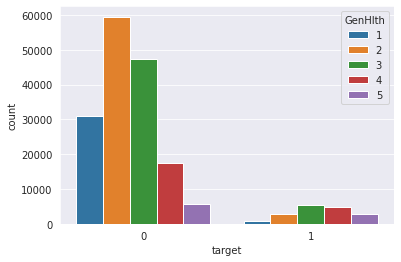

In [26]:
sns.countplot(x='target', hue='GenHlth', data=train)

### Age
(18-24: 1, 25-29: 2, 30-34: 3,...., 75-79: 12, 80+: 13)

We can treat this as an ordinal categorical variable as well as a continous variable.

In [27]:
sorted(train['Age'].unique()), sorted(test['Age'].unique())

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])

In [28]:
train['Age'].value_counts(normalize=True).sort_index()

1     0.0222
2     0.0299
3     0.0444
4     0.0545
5     0.0635
6     0.0779
7     0.1037
8     0.1223
9     0.1312
10    0.1262
11    0.0924
12    0.0629
13    0.0689
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='count'>

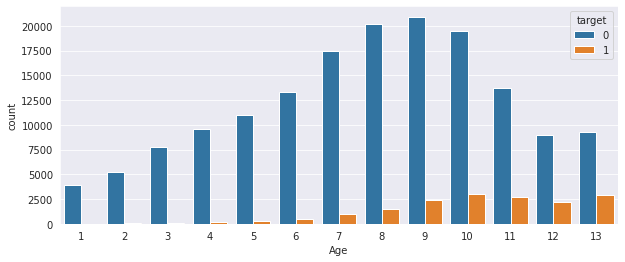

In [29]:
plt.figure(figsize=(10,4))
sns.countplot(x='Age', data=train, hue='target')

### Education

In [30]:
display_stats(train, 'Education', 'target')

Relative frequency:
1    0.0007
2    0.0161
3    0.0374
4    0.2477
5    0.2759
6    0.4222
Name: Education, dtype: float64

Target distribution grouped by Education:
Education  target
1          0         0.8095
           1         0.1905
2          0         0.8090
           1         0.1910
3          0         0.8346
           1         0.1654
4          0         0.8809
           1         0.1191
5          0         0.9005
           1         0.0995
6          0         0.9341
           1         0.0659
Name: target, dtype: float64

Correlation with target: -0.0984


<AxesSubplot:xlabel='Education', ylabel='count'>

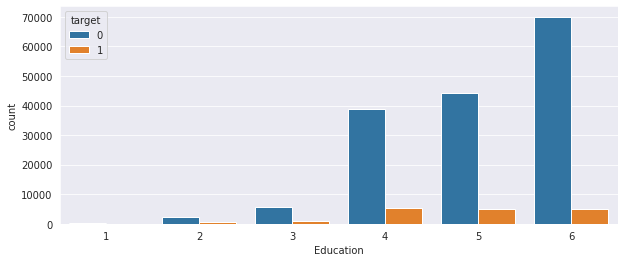

In [31]:
plt.figure(figsize=(10,4))
sns.countplot(x='Education', data=train, hue='target')

### Income

In [32]:
display_stats(train, 'Income', 'target')

Relative frequency:
1    0.0387
2    0.0466
3    0.0636
4    0.0803
5    0.1016
6    0.1437
7    0.1703
8    0.3554
Name: Income, dtype: float64

Target distribution grouped by Income:
Income  target
1       0         0.8393
        1         0.1607
2       0         0.8124
        1         0.1876
3       0         0.8432
        1         0.1568
4       0         0.8596
        1         0.1404
5       0         0.8786
        1         0.1214
6       0         0.8994
        1         0.1006
7       0         0.9221
        1         0.0779
8       0         0.9495
        1         0.0505
Name: target, dtype: float64

Correlation with target: -0.1424


<AxesSubplot:xlabel='Income', ylabel='count'>

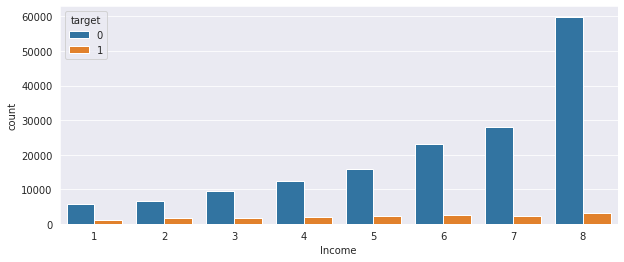

In [33]:
plt.figure(figsize=(10,4))
sns.countplot(x='Income', data=train, hue='target')

# Numerical features

### BMI

In [34]:
train['BMI'].min(), train['BMI'].max()

(12, 98)

In [35]:
test['BMI'].min(), test['BMI'].max()

(12, 98)

<AxesSubplot:xlabel='BMI', ylabel='Density'>

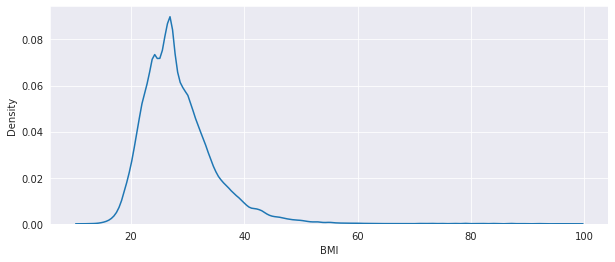

In [36]:
plt.figure(figsize=(10,4))
sns.kdeplot(x='BMI', data=train)

### MentHlth, PhysHlth
(between 0 to 31 - number of days mental/physical health felt poor)

<AxesSubplot:xlabel='MentHlth', ylabel='count'>

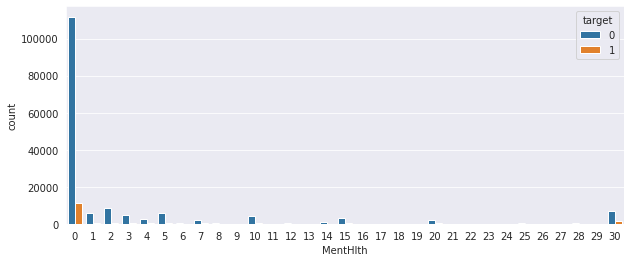

In [37]:
plt.figure(figsize=(10,4))
sns.countplot(x='MentHlth', data=train, hue='target')

<AxesSubplot:xlabel='PhysHlth', ylabel='count'>

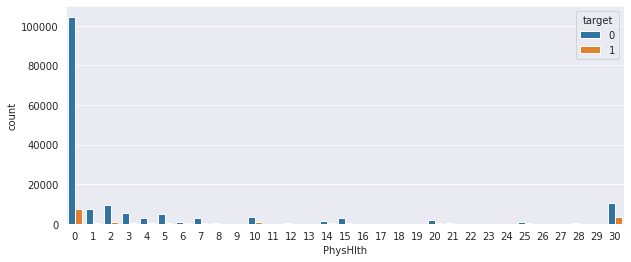

In [38]:
plt.figure(figsize=(10,4))
sns.countplot(x='PhysHlth', data=train, hue='target')

Both these columns have extremely skewed proportions.  
From experience, these could have been insightful features, but may not be so useful while statistical modelling.

# Feature Importances

In [39]:
features = [f for f in train.columns if f not in ('PatientID', 'target')]

In [40]:
estimator = ExtraTreesClassifier(n_estimators=100, random_state=SEED, n_jobs=-1)

In [41]:
estimator.fit(train[features], train['target'])

ExtraTreesClassifier(n_jobs=-1, random_state=2311)

In [42]:
pd.DataFrame({'feature': features, 'importance': estimator.feature_importances_})

,feature,importance
0,HighBP,0.0269
1,HighChol,0.0236
2,CholCheck,0.0040
3,BMI,0.1839
4,Smoker,0.0177
5,Stroke,0.0285
6,Diabetes,0.0266
7,PhysActivity,0.0275
8,Fruits,0.0308
9,Veggies,0.0262


* As expected, BMI and Age are relatively strong indicators of risk of heart disease. 
* General, Mental and Physical health are also good indicators, as expected from our experience.
* Income is an unexpectedly strong indicator; higher income could imply better diet and healthcare at all stages of life and thus, lesser risk of heart disease.